<a href="https://colab.research.google.com/github/alemskdlt/dl02/blob/main/project/gan/gan_cifar10_wrtn_e1000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GAN
> DCGAN: Deep Convolutional GAN
- ## cifar10
- ## wrtn.ai
- > cifar10 데이터에 대한 GAN tensorflow code를 만들어줘.

In [ ]:
# 우선, 필요한 라이브러리들을 불러옵니다.


import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt

BATCH_SIZE = 256

# 데이터로더 함수를 정의합니다.


def load_data():
    (train_images, _), (_, _) = tf.keras.datasets.cifar10.load_data()
    train_images = train_images.astype('float32')
    train_images = (train_images - 127.5) / 127.5
    BUFFER_SIZE = 60000
    BATCH_SIZE = 256
    train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
    return train_dataset



# 생성자 모델을 구축합니다.


def create_generator():
    model = tf.keras.Sequential([
        layers.Dense(8*8*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Reshape((8, 8, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
    ])
    return model



# 판별자 모델을 구축합니다.


def create_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1)
    ])

    return model



# 손실함수와 옵티마이저를 정의합니다.


cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


In [ ]:
# 훈련 과정을 정의합니다.


EPOCHS = 1000
noise_dim = 100
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, noise_dim])

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    # Back-propagation
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

def generate_and_save_images(epoch):
    predictions = generator(seed, training=False)
    plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow((predictions[i] + 1) / 2)
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)

        print(f'EPOCH: {epoch+1}')
        if (epoch+1)%50 == 0:
          generate_and_save_images(epoch+1)





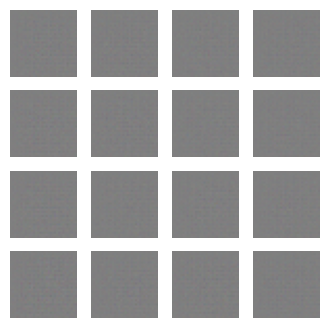

170498071/170498071 [==============================] - 2s 0us/step
EPOCH: 1
EPOCH: 2
EPOCH: 3
EPOCH: 4
EPOCH: 5
EPOCH: 6
EPOCH: 7
EPOCH: 8
EPOCH: 9
EPOCH: 10
EPOCH: 11
EPOCH: 12
EPOCH: 13
EPOCH: 14
EPOCH: 15
EPOCH: 16
EPOCH: 17
EPOCH: 18
EPOCH: 19
EPOCH: 20
EPOCH: 21
EPOCH: 22
EPOCH: 23
EPOCH: 24
EPOCH: 25
EPOCH: 26
EPOCH: 27
EPOCH: 28
EPOCH: 29
EPOCH: 30
EPOCH: 31
EPOCH: 32
EPOCH: 33
EPOCH: 34
EPOCH: 35
EPOCH: 36
EPOCH: 37
EPOCH: 38
EPOCH: 39
EPOCH: 40
EPOCH: 41
EPOCH: 42
EPOCH: 43
EPOCH: 44
EPOCH: 45
EPOCH: 46
EPOCH: 47
EPOCH: 48
EPOCH: 49
EPOCH: 50


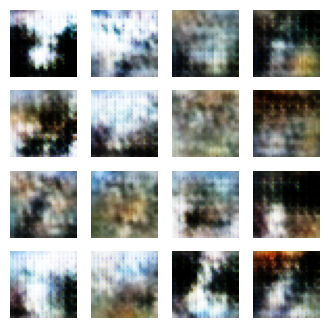

EPOCH: 51
EPOCH: 52
EPOCH: 53
EPOCH: 54
EPOCH: 55
EPOCH: 56
EPOCH: 57
EPOCH: 58
EPOCH: 59
EPOCH: 60
EPOCH: 61
EPOCH: 62
EPOCH: 63
EPOCH: 64
EPOCH: 65
EPOCH: 66
EPOCH: 67
EPOCH: 68
EPOCH: 69
EPOCH: 70
EPOCH: 71
EPOCH: 72
EPOCH: 73
EPOCH: 74
EPOCH: 75
EPOCH: 76
EPOCH: 77
EPOCH: 78
EPOCH: 79
EPOCH: 80
EPOCH: 81
EPOCH: 82
EPOCH: 83
EPOCH: 84
EPOCH: 85
EPOCH: 86
EPOCH: 87
EPOCH: 88
EPOCH: 89
EPOCH: 90
EPOCH: 91
EPOCH: 92
EPOCH: 93
EPOCH: 94
EPOCH: 95
EPOCH: 96
EPOCH: 97
EPOCH: 98
EPOCH: 99
EPOCH: 100


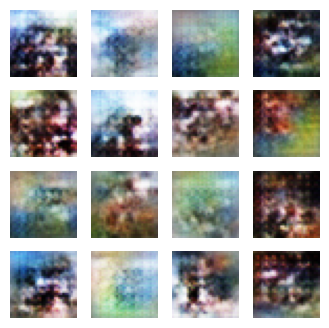

EPOCH: 101
EPOCH: 102
EPOCH: 103
EPOCH: 104
EPOCH: 105
EPOCH: 106
EPOCH: 107
EPOCH: 108
EPOCH: 109
EPOCH: 110
EPOCH: 111
EPOCH: 112
EPOCH: 113
EPOCH: 114
EPOCH: 115
EPOCH: 116
EPOCH: 117
EPOCH: 118
EPOCH: 119
EPOCH: 120
EPOCH: 121
EPOCH: 122
EPOCH: 123
EPOCH: 124
EPOCH: 125
EPOCH: 126
EPOCH: 127
EPOCH: 128
EPOCH: 129
EPOCH: 130
EPOCH: 131
EPOCH: 132
EPOCH: 133
EPOCH: 134
EPOCH: 135
EPOCH: 136
EPOCH: 137
EPOCH: 138
EPOCH: 139
EPOCH: 140
EPOCH: 141
EPOCH: 142
EPOCH: 143
EPOCH: 144
EPOCH: 145
EPOCH: 146
EPOCH: 147
EPOCH: 148
EPOCH: 149
EPOCH: 150


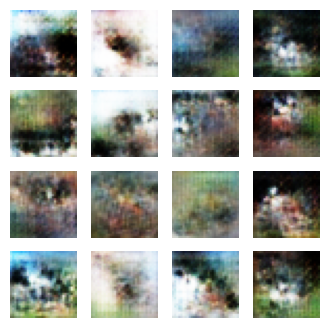

EPOCH: 151
EPOCH: 152
EPOCH: 153
EPOCH: 154
EPOCH: 155
EPOCH: 156
EPOCH: 157
EPOCH: 158
EPOCH: 159
EPOCH: 160
EPOCH: 161
EPOCH: 162
EPOCH: 163
EPOCH: 164
EPOCH: 165
EPOCH: 166
EPOCH: 167
EPOCH: 168
EPOCH: 169
EPOCH: 170
EPOCH: 171
EPOCH: 172
EPOCH: 173
EPOCH: 174
EPOCH: 175
EPOCH: 176
EPOCH: 177
EPOCH: 178
EPOCH: 179
EPOCH: 180
EPOCH: 181
EPOCH: 182
EPOCH: 183
EPOCH: 184
EPOCH: 185
EPOCH: 186
EPOCH: 187
EPOCH: 188
EPOCH: 189
EPOCH: 190
EPOCH: 191
EPOCH: 192
EPOCH: 193
EPOCH: 194
EPOCH: 195
EPOCH: 196
EPOCH: 197
EPOCH: 198
EPOCH: 199
EPOCH: 200


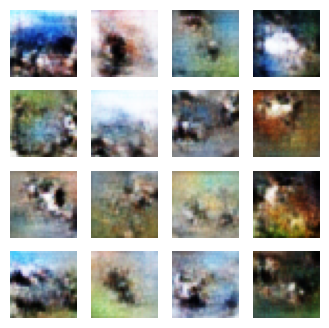

EPOCH: 201
EPOCH: 202
EPOCH: 203
EPOCH: 204
EPOCH: 205
EPOCH: 206
EPOCH: 207
EPOCH: 208
EPOCH: 209
EPOCH: 210
EPOCH: 211
EPOCH: 212
EPOCH: 213
EPOCH: 214
EPOCH: 215
EPOCH: 216
EPOCH: 217
EPOCH: 218
EPOCH: 219
EPOCH: 220
EPOCH: 221
EPOCH: 222
EPOCH: 223
EPOCH: 224
EPOCH: 225
EPOCH: 226
EPOCH: 227
EPOCH: 228
EPOCH: 229
EPOCH: 230
EPOCH: 231
EPOCH: 232
EPOCH: 233
EPOCH: 234
EPOCH: 235
EPOCH: 236
EPOCH: 237
EPOCH: 238
EPOCH: 239
EPOCH: 240
EPOCH: 241
EPOCH: 242
EPOCH: 243
EPOCH: 244
EPOCH: 245
EPOCH: 246
EPOCH: 247
EPOCH: 248
EPOCH: 249
EPOCH: 250


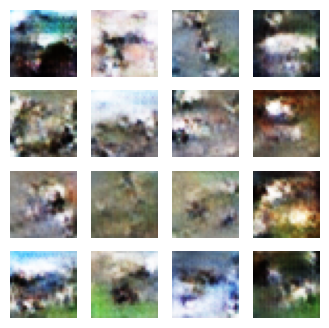

EPOCH: 251
EPOCH: 252
EPOCH: 253
EPOCH: 254
EPOCH: 255
EPOCH: 256
EPOCH: 257
EPOCH: 258
EPOCH: 259
EPOCH: 260
EPOCH: 261
EPOCH: 262
EPOCH: 263
EPOCH: 264
EPOCH: 265
EPOCH: 266
EPOCH: 267
EPOCH: 268
EPOCH: 269
EPOCH: 270
EPOCH: 271
EPOCH: 272
EPOCH: 273
EPOCH: 274
EPOCH: 275
EPOCH: 276
EPOCH: 277
EPOCH: 278
EPOCH: 279
EPOCH: 280
EPOCH: 281
EPOCH: 282
EPOCH: 283
EPOCH: 284
EPOCH: 285
EPOCH: 286
EPOCH: 287
EPOCH: 288
EPOCH: 289
EPOCH: 290
EPOCH: 291
EPOCH: 292
EPOCH: 293
EPOCH: 294
EPOCH: 295
EPOCH: 296
EPOCH: 297
EPOCH: 298
EPOCH: 299
EPOCH: 300


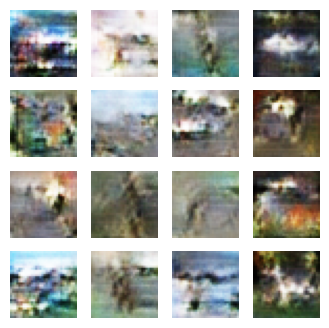

EPOCH: 301
EPOCH: 302
EPOCH: 303
EPOCH: 304
EPOCH: 305
EPOCH: 306
EPOCH: 307
EPOCH: 308
EPOCH: 309
EPOCH: 310
EPOCH: 311
EPOCH: 312
EPOCH: 313
EPOCH: 314
EPOCH: 315
EPOCH: 316
EPOCH: 317
EPOCH: 318
EPOCH: 319
EPOCH: 320
EPOCH: 321
EPOCH: 322
EPOCH: 323
EPOCH: 324
EPOCH: 325
EPOCH: 326
EPOCH: 327
EPOCH: 328
EPOCH: 329
EPOCH: 330
EPOCH: 331
EPOCH: 332
EPOCH: 333
EPOCH: 334
EPOCH: 335
EPOCH: 336
EPOCH: 337
EPOCH: 338
EPOCH: 339
EPOCH: 340
EPOCH: 341
EPOCH: 342
EPOCH: 343
EPOCH: 344
EPOCH: 345
EPOCH: 346
EPOCH: 347
EPOCH: 348
EPOCH: 349
EPOCH: 350


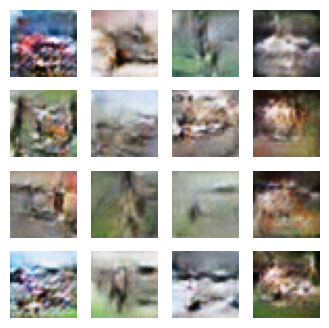

EPOCH: 351
EPOCH: 352
EPOCH: 353
EPOCH: 354
EPOCH: 355
EPOCH: 356
EPOCH: 357
EPOCH: 358
EPOCH: 359
EPOCH: 360
EPOCH: 361
EPOCH: 362
EPOCH: 363
EPOCH: 364
EPOCH: 365
EPOCH: 366
EPOCH: 367
EPOCH: 368
EPOCH: 369
EPOCH: 370
EPOCH: 371
EPOCH: 372
EPOCH: 373
EPOCH: 374
EPOCH: 375
EPOCH: 376
EPOCH: 377
EPOCH: 378
EPOCH: 379
EPOCH: 380
EPOCH: 381
EPOCH: 382
EPOCH: 383
EPOCH: 384
EPOCH: 385
EPOCH: 386
EPOCH: 387
EPOCH: 388
EPOCH: 389
EPOCH: 390
EPOCH: 391
EPOCH: 392
EPOCH: 393
EPOCH: 394
EPOCH: 395
EPOCH: 396
EPOCH: 397
EPOCH: 398
EPOCH: 399
EPOCH: 400


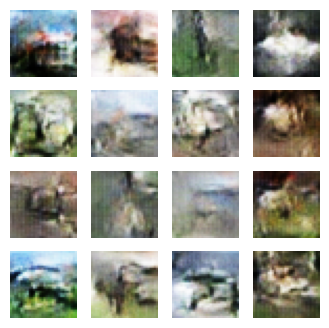

EPOCH: 401
EPOCH: 402
EPOCH: 403
EPOCH: 404
EPOCH: 405
EPOCH: 406
EPOCH: 407
EPOCH: 408
EPOCH: 409
EPOCH: 410
EPOCH: 411
EPOCH: 412
EPOCH: 413
EPOCH: 414
EPOCH: 415
EPOCH: 416
EPOCH: 417
EPOCH: 418
EPOCH: 419
EPOCH: 420
EPOCH: 421
EPOCH: 422
EPOCH: 423
EPOCH: 424
EPOCH: 425
EPOCH: 426
EPOCH: 427
EPOCH: 428
EPOCH: 429
EPOCH: 430
EPOCH: 431
EPOCH: 432
EPOCH: 433
EPOCH: 434
EPOCH: 435
EPOCH: 436
EPOCH: 437
EPOCH: 438
EPOCH: 439
EPOCH: 440
EPOCH: 441
EPOCH: 442
EPOCH: 443
EPOCH: 444
EPOCH: 445
EPOCH: 446
EPOCH: 447
EPOCH: 448
EPOCH: 449
EPOCH: 450


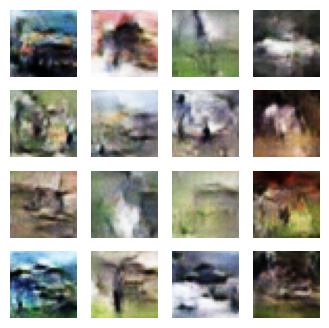

EPOCH: 451
EPOCH: 452
EPOCH: 453
EPOCH: 454
EPOCH: 455
EPOCH: 456
EPOCH: 457
EPOCH: 458
EPOCH: 459
EPOCH: 460
EPOCH: 461
EPOCH: 462
EPOCH: 463
EPOCH: 464
EPOCH: 465
EPOCH: 466
EPOCH: 467
EPOCH: 468
EPOCH: 469
EPOCH: 470
EPOCH: 471
EPOCH: 472
EPOCH: 473
EPOCH: 474
EPOCH: 475
EPOCH: 476
EPOCH: 477
EPOCH: 478
EPOCH: 479
EPOCH: 480
EPOCH: 481
EPOCH: 482
EPOCH: 483
EPOCH: 484
EPOCH: 485
EPOCH: 486
EPOCH: 487
EPOCH: 488
EPOCH: 489
EPOCH: 490
EPOCH: 491
EPOCH: 492
EPOCH: 493
EPOCH: 494
EPOCH: 495
EPOCH: 496
EPOCH: 497
EPOCH: 498
EPOCH: 499
EPOCH: 500


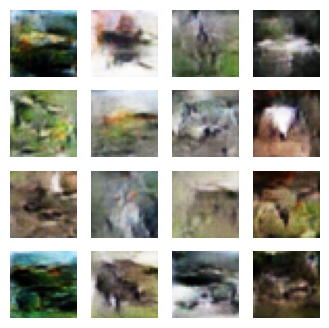

EPOCH: 501
EPOCH: 502
EPOCH: 503
EPOCH: 504
EPOCH: 505
EPOCH: 506
EPOCH: 507
EPOCH: 508
EPOCH: 509
EPOCH: 510
EPOCH: 511
EPOCH: 512
EPOCH: 513
EPOCH: 514
EPOCH: 515
EPOCH: 516
EPOCH: 517
EPOCH: 518
EPOCH: 519
EPOCH: 520
EPOCH: 521
EPOCH: 522
EPOCH: 523
EPOCH: 524
EPOCH: 525
EPOCH: 526
EPOCH: 527
EPOCH: 528
EPOCH: 529
EPOCH: 530
EPOCH: 531
EPOCH: 532
EPOCH: 533
EPOCH: 534
EPOCH: 535
EPOCH: 536
EPOCH: 537
EPOCH: 538
EPOCH: 539
EPOCH: 540
EPOCH: 541
EPOCH: 542
EPOCH: 543
EPOCH: 544
EPOCH: 545
EPOCH: 546
EPOCH: 547
EPOCH: 548
EPOCH: 549
EPOCH: 550


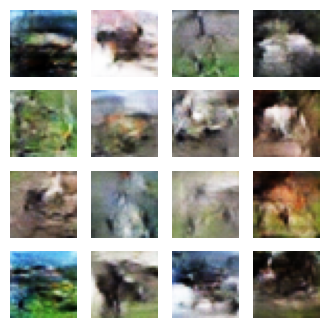

EPOCH: 551
EPOCH: 552
EPOCH: 553
EPOCH: 554
EPOCH: 555
EPOCH: 556
EPOCH: 557
EPOCH: 558
EPOCH: 559
EPOCH: 560
EPOCH: 561
EPOCH: 562
EPOCH: 563
EPOCH: 564
EPOCH: 565
EPOCH: 566
EPOCH: 567
EPOCH: 568
EPOCH: 569
EPOCH: 570
EPOCH: 571
EPOCH: 572
EPOCH: 573
EPOCH: 574
EPOCH: 575
EPOCH: 576
EPOCH: 577
EPOCH: 578
EPOCH: 579
EPOCH: 580
EPOCH: 581
EPOCH: 582
EPOCH: 583
EPOCH: 584
EPOCH: 585
EPOCH: 586
EPOCH: 587
EPOCH: 588
EPOCH: 589
EPOCH: 590
EPOCH: 591
EPOCH: 592
EPOCH: 593
EPOCH: 594
EPOCH: 595
EPOCH: 596
EPOCH: 597
EPOCH: 598
EPOCH: 599
EPOCH: 600


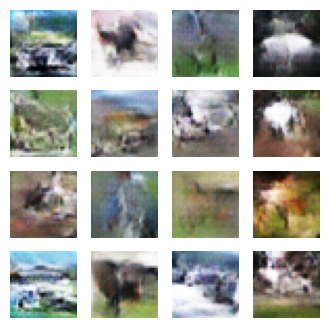

EPOCH: 601
EPOCH: 602
EPOCH: 603
EPOCH: 604
EPOCH: 605
EPOCH: 606
EPOCH: 607
EPOCH: 608
EPOCH: 609
EPOCH: 610
EPOCH: 611
EPOCH: 612
EPOCH: 613
EPOCH: 614
EPOCH: 615
EPOCH: 616
EPOCH: 617
EPOCH: 618
EPOCH: 619
EPOCH: 620
EPOCH: 621
EPOCH: 622
EPOCH: 623
EPOCH: 624
EPOCH: 625
EPOCH: 626
EPOCH: 627
EPOCH: 628
EPOCH: 629
EPOCH: 630
EPOCH: 631
EPOCH: 632
EPOCH: 633
EPOCH: 634
EPOCH: 635
EPOCH: 636
EPOCH: 637
EPOCH: 638
EPOCH: 639
EPOCH: 640
EPOCH: 641
EPOCH: 642
EPOCH: 643
EPOCH: 644
EPOCH: 645
EPOCH: 646
EPOCH: 647
EPOCH: 648
EPOCH: 649
EPOCH: 650


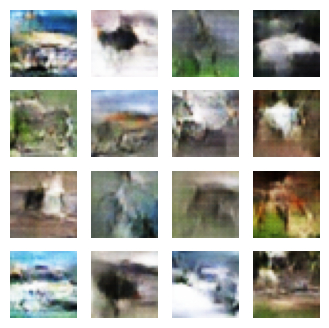

EPOCH: 651
EPOCH: 652
EPOCH: 653
EPOCH: 654
EPOCH: 655
EPOCH: 656
EPOCH: 657
EPOCH: 658
EPOCH: 659
EPOCH: 660
EPOCH: 661
EPOCH: 662
EPOCH: 663
EPOCH: 664
EPOCH: 665
EPOCH: 666
EPOCH: 667
EPOCH: 668
EPOCH: 669
EPOCH: 670
EPOCH: 671
EPOCH: 672
EPOCH: 673
EPOCH: 674
EPOCH: 675
EPOCH: 676
EPOCH: 677
EPOCH: 678
EPOCH: 679
EPOCH: 680
EPOCH: 681
EPOCH: 682
EPOCH: 683
EPOCH: 684
EPOCH: 685
EPOCH: 686
EPOCH: 687
EPOCH: 688
EPOCH: 689
EPOCH: 690
EPOCH: 691
EPOCH: 692
EPOCH: 693
EPOCH: 694
EPOCH: 695
EPOCH: 696
EPOCH: 697
EPOCH: 698
EPOCH: 699
EPOCH: 700


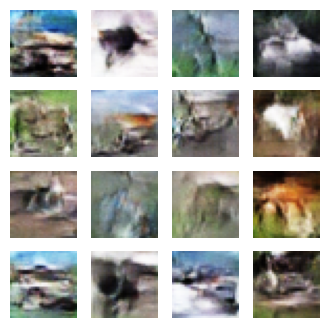

EPOCH: 701
EPOCH: 702
EPOCH: 703
EPOCH: 704
EPOCH: 705
EPOCH: 706
EPOCH: 707
EPOCH: 708
EPOCH: 709
EPOCH: 710
EPOCH: 711
EPOCH: 712
EPOCH: 713
EPOCH: 714
EPOCH: 715
EPOCH: 716
EPOCH: 717
EPOCH: 718
EPOCH: 719
EPOCH: 720
EPOCH: 721
EPOCH: 722
EPOCH: 723
EPOCH: 724
EPOCH: 725
EPOCH: 726
EPOCH: 727
EPOCH: 728
EPOCH: 729
EPOCH: 730
EPOCH: 731
EPOCH: 732
EPOCH: 733
EPOCH: 734
EPOCH: 735
EPOCH: 736
EPOCH: 737
EPOCH: 738
EPOCH: 739
EPOCH: 740
EPOCH: 741
EPOCH: 742
EPOCH: 743
EPOCH: 744
EPOCH: 745
EPOCH: 746
EPOCH: 747
EPOCH: 748
EPOCH: 749
EPOCH: 750


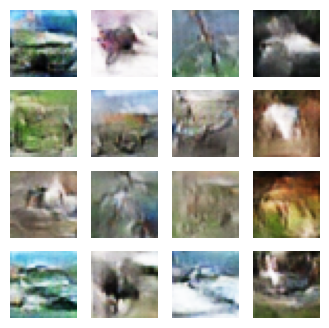

EPOCH: 751
EPOCH: 752
EPOCH: 753
EPOCH: 754
EPOCH: 755
EPOCH: 756
EPOCH: 757
EPOCH: 758
EPOCH: 759
EPOCH: 760
EPOCH: 761
EPOCH: 762
EPOCH: 763
EPOCH: 764
EPOCH: 765
EPOCH: 766
EPOCH: 767
EPOCH: 768
EPOCH: 769
EPOCH: 770
EPOCH: 771
EPOCH: 772
EPOCH: 773
EPOCH: 774
EPOCH: 775
EPOCH: 776
EPOCH: 777
EPOCH: 778
EPOCH: 779
EPOCH: 780
EPOCH: 781
EPOCH: 782
EPOCH: 783
EPOCH: 784
EPOCH: 785
EPOCH: 786
EPOCH: 787
EPOCH: 788
EPOCH: 789
EPOCH: 790
EPOCH: 791
EPOCH: 792
EPOCH: 793
EPOCH: 794
EPOCH: 795
EPOCH: 796
EPOCH: 797
EPOCH: 798
EPOCH: 799
EPOCH: 800


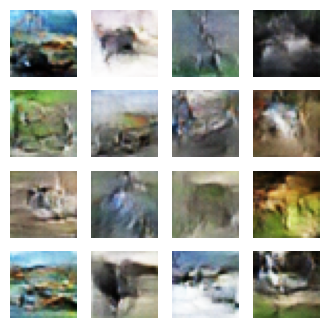

EPOCH: 801
EPOCH: 802
EPOCH: 803
EPOCH: 804
EPOCH: 805
EPOCH: 806
EPOCH: 807
EPOCH: 808
EPOCH: 809
EPOCH: 810
EPOCH: 811
EPOCH: 812
EPOCH: 813
EPOCH: 814
EPOCH: 815
EPOCH: 816
EPOCH: 817
EPOCH: 818
EPOCH: 819
EPOCH: 820
EPOCH: 821
EPOCH: 822
EPOCH: 823
EPOCH: 824
EPOCH: 825
EPOCH: 826
EPOCH: 827
EPOCH: 828
EPOCH: 829
EPOCH: 830
EPOCH: 831
EPOCH: 832
EPOCH: 833
EPOCH: 834
EPOCH: 835
EPOCH: 836
EPOCH: 837
EPOCH: 838
EPOCH: 839
EPOCH: 840
EPOCH: 841
EPOCH: 842
EPOCH: 843
EPOCH: 844
EPOCH: 845
EPOCH: 846
EPOCH: 847
EPOCH: 848
EPOCH: 849
EPOCH: 850


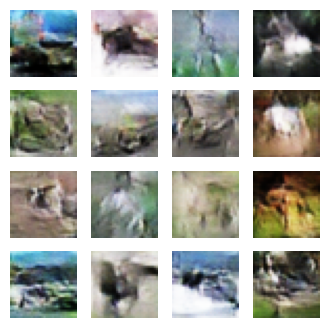

EPOCH: 851
EPOCH: 852
EPOCH: 853
EPOCH: 854
EPOCH: 855
EPOCH: 856
EPOCH: 857
EPOCH: 858
EPOCH: 859
EPOCH: 860
EPOCH: 861
EPOCH: 862
EPOCH: 863
EPOCH: 864
EPOCH: 865
EPOCH: 866
EPOCH: 867
EPOCH: 868
EPOCH: 869
EPOCH: 870
EPOCH: 871
EPOCH: 872
EPOCH: 873
EPOCH: 874
EPOCH: 875
EPOCH: 876
EPOCH: 877
EPOCH: 878
EPOCH: 879
EPOCH: 880
EPOCH: 881
EPOCH: 882
EPOCH: 883
EPOCH: 884
EPOCH: 885
EPOCH: 886
EPOCH: 887
EPOCH: 888
EPOCH: 889
EPOCH: 890
EPOCH: 891
EPOCH: 892
EPOCH: 893
EPOCH: 894
EPOCH: 895
EPOCH: 896
EPOCH: 897
EPOCH: 898
EPOCH: 899
EPOCH: 900


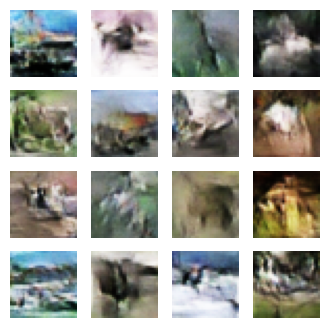

EPOCH: 901
EPOCH: 902
EPOCH: 903
EPOCH: 904
EPOCH: 905
EPOCH: 906
EPOCH: 907
EPOCH: 908
EPOCH: 909
EPOCH: 910
EPOCH: 911
EPOCH: 912
EPOCH: 913
EPOCH: 914
EPOCH: 915
EPOCH: 916
EPOCH: 917
EPOCH: 918
EPOCH: 919
EPOCH: 920
EPOCH: 921
EPOCH: 922
EPOCH: 923
EPOCH: 924
EPOCH: 925
EPOCH: 926
EPOCH: 927
EPOCH: 928
EPOCH: 929
EPOCH: 930
EPOCH: 931
EPOCH: 932
EPOCH: 933
EPOCH: 934
EPOCH: 935
EPOCH: 936
EPOCH: 937
EPOCH: 938
EPOCH: 939
EPOCH: 940
EPOCH: 941
EPOCH: 942
EPOCH: 943
EPOCH: 944
EPOCH: 945
EPOCH: 946
EPOCH: 947
EPOCH: 948
EPOCH: 949
EPOCH: 950


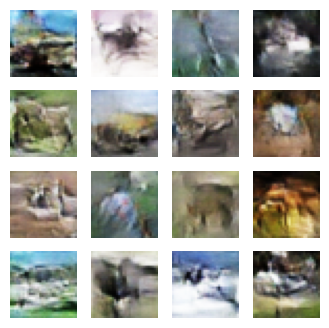

EPOCH: 951
EPOCH: 952
EPOCH: 953
EPOCH: 954
EPOCH: 955
EPOCH: 956
EPOCH: 957
EPOCH: 958
EPOCH: 959
EPOCH: 960
EPOCH: 961
EPOCH: 962
EPOCH: 963
EPOCH: 964
EPOCH: 965
EPOCH: 966
EPOCH: 967
EPOCH: 968
EPOCH: 969
EPOCH: 970
EPOCH: 971
EPOCH: 972
EPOCH: 973
EPOCH: 974
EPOCH: 975
EPOCH: 976
EPOCH: 977
EPOCH: 978
EPOCH: 979
EPOCH: 980
EPOCH: 981
EPOCH: 982
EPOCH: 983
EPOCH: 984
EPOCH: 985
EPOCH: 986
EPOCH: 987
EPOCH: 988
EPOCH: 989
EPOCH: 990
EPOCH: 991
EPOCH: 992
EPOCH: 993
EPOCH: 994
EPOCH: 995
EPOCH: 996
EPOCH: 997
EPOCH: 998
EPOCH: 999
EPOCH: 1000


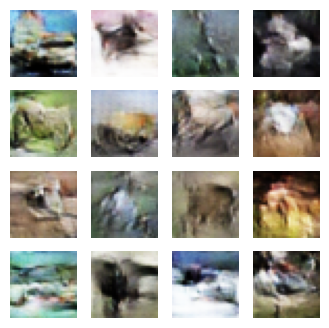

In [ ]:
# 마지막으로, 생성 및 판별자 모델을 생성하고 훈련을 시작합니다.


generator = create_generator()
discriminator = create_discriminator()

generate_and_save_images(0)

train_dataset = load_data()
train(train_dataset, EPOCHS)



# 이제 이 코드를 실행하면, CIFAR-10 데이터셋을 사용하여 GAN 모델이 훈련되기 시작합니다. 
# 훈련이 진행됨에 따라, 생성자가 생성한 이미지가 점점 개선되는 것을 확인할 수 있습니다.

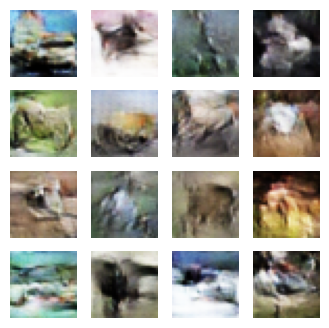

In [ ]:
generate_and_save_images(EPOCHS+2)

#### > Colab에서 3시간 GPU 사용하여서 모델을 훈련시켰지만 아직 제대로 만들지 뭇하는 수준 ...